# Bed profile - Veteranen

Notebook for creating plots of the bed of the glacier Veteranen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

try:
    parameters = [alpha, beta, nu, kappa, c, w, L0, E0s, E0w] = np.genfromtxt("parameters_veteranen.txt")
except OSError:
    parameters = [alpha, beta, nu, kappa, c, w, L0, E0s, E0w] = [1.2, 0.005, 10, 0.5, 1, 1, 1, 500, 500]

fig_w = 8
fig_h = 4
dpi = 300

## Bed

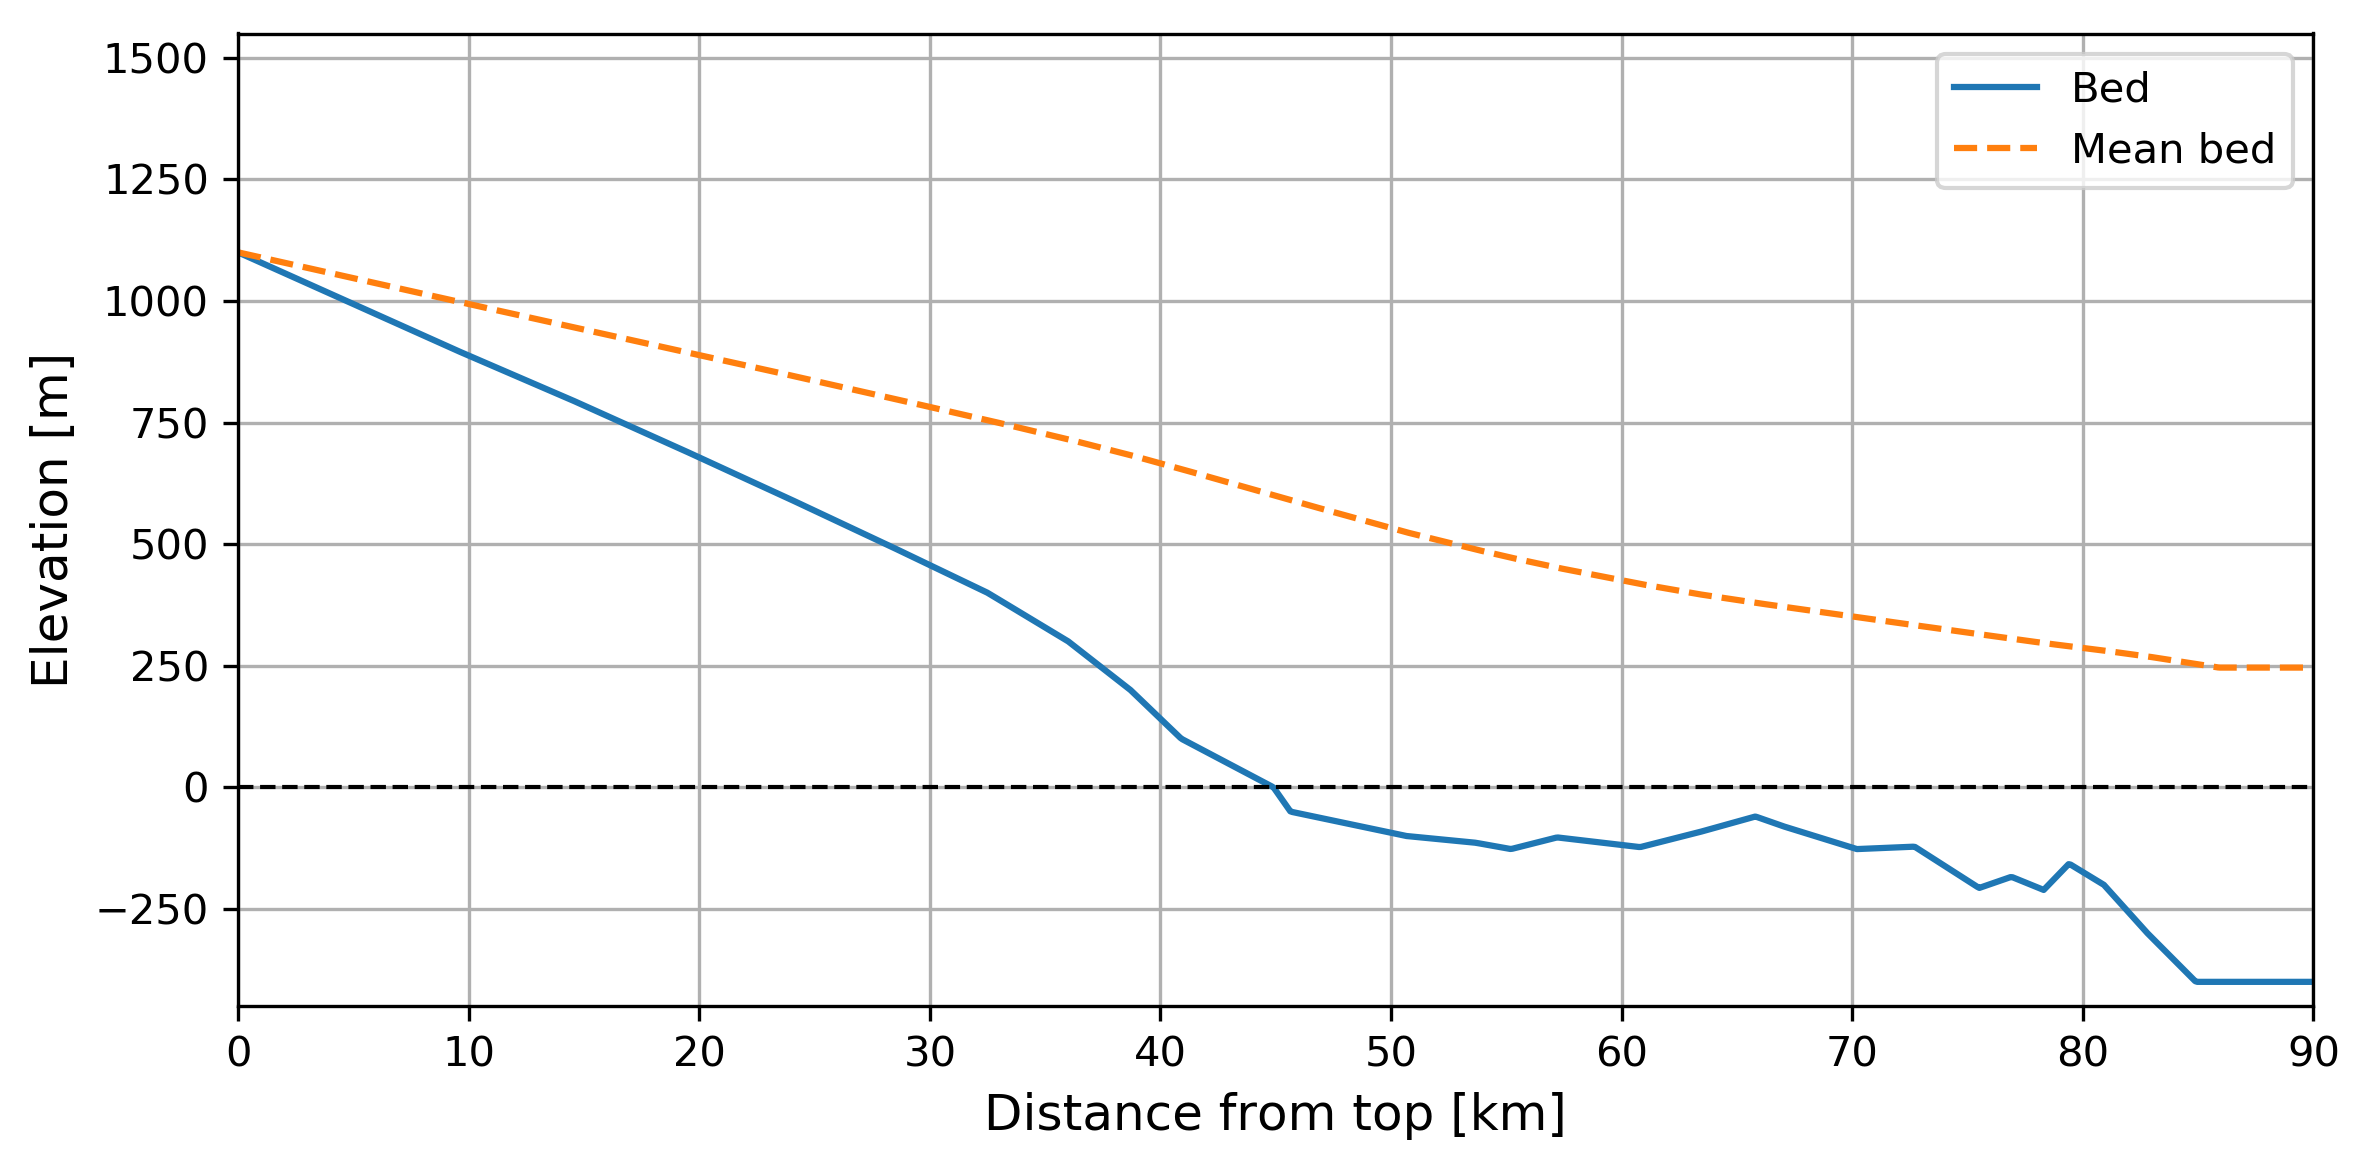

In [2]:
veteranen = CustomBedModel(x1, y1, name="Veteranen", alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w)

for [L, w0, h0, w1, h1, s, q] in tributary_data:
    veteranen.add_bucket_tributary(L, w0, w1, h0, h1)
        
x = np.linspace(0, 90000, 1001)

sl_index = np.argwhere(np.array([veteranen.bed(xi) for xi in x]) <= 0)[0]
sl_x = x[sl_index][0]

y = [veteranen.bed(xi) for xi in x]

plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.plot(x/1e3, y, "-", label="Bed")
plt.plot(x/1e3, [veteranen.mean_bed(xi) for xi in x], "--", label="Mean bed")
plt.plot(x/1e3, np.zeros(np.size(x)), "--", c="black", linewidth=1) # sealevel
# plt.plot([sl_x/1e3, sl_x/1e3], [-1500, 1500], "--", c="gray", linewidth=1) # sealevel crossing

# for trib in veteranen.tributary:
#     x_i = np.int(np.argwhere(y < trib.h0)[0])
#     # print(x[x_i], trib.h0)
#     # plt.plot(2*[x[x_i]/1e3], [trib.h0, trib.h1], c="red") # lines
#     plt.scatter(x[x_i]/1e3, trib.h0, s=25, c="red", marker="+") # points

# plt.title("Bed")
plt.grid()
plt.legend()
plt.xlim([np.min(x)/1e3, np.max(x)/1e3])
plt.ylim([-450, 1550])
plt.xlabel("Distance from top [km]", fontsize=12)
plt.ylabel("Elevation [m]", fontsize=12)
plt.tight_layout()
plt.savefig("figures/bed.png")
plt.show()

## Bed + Tributaries

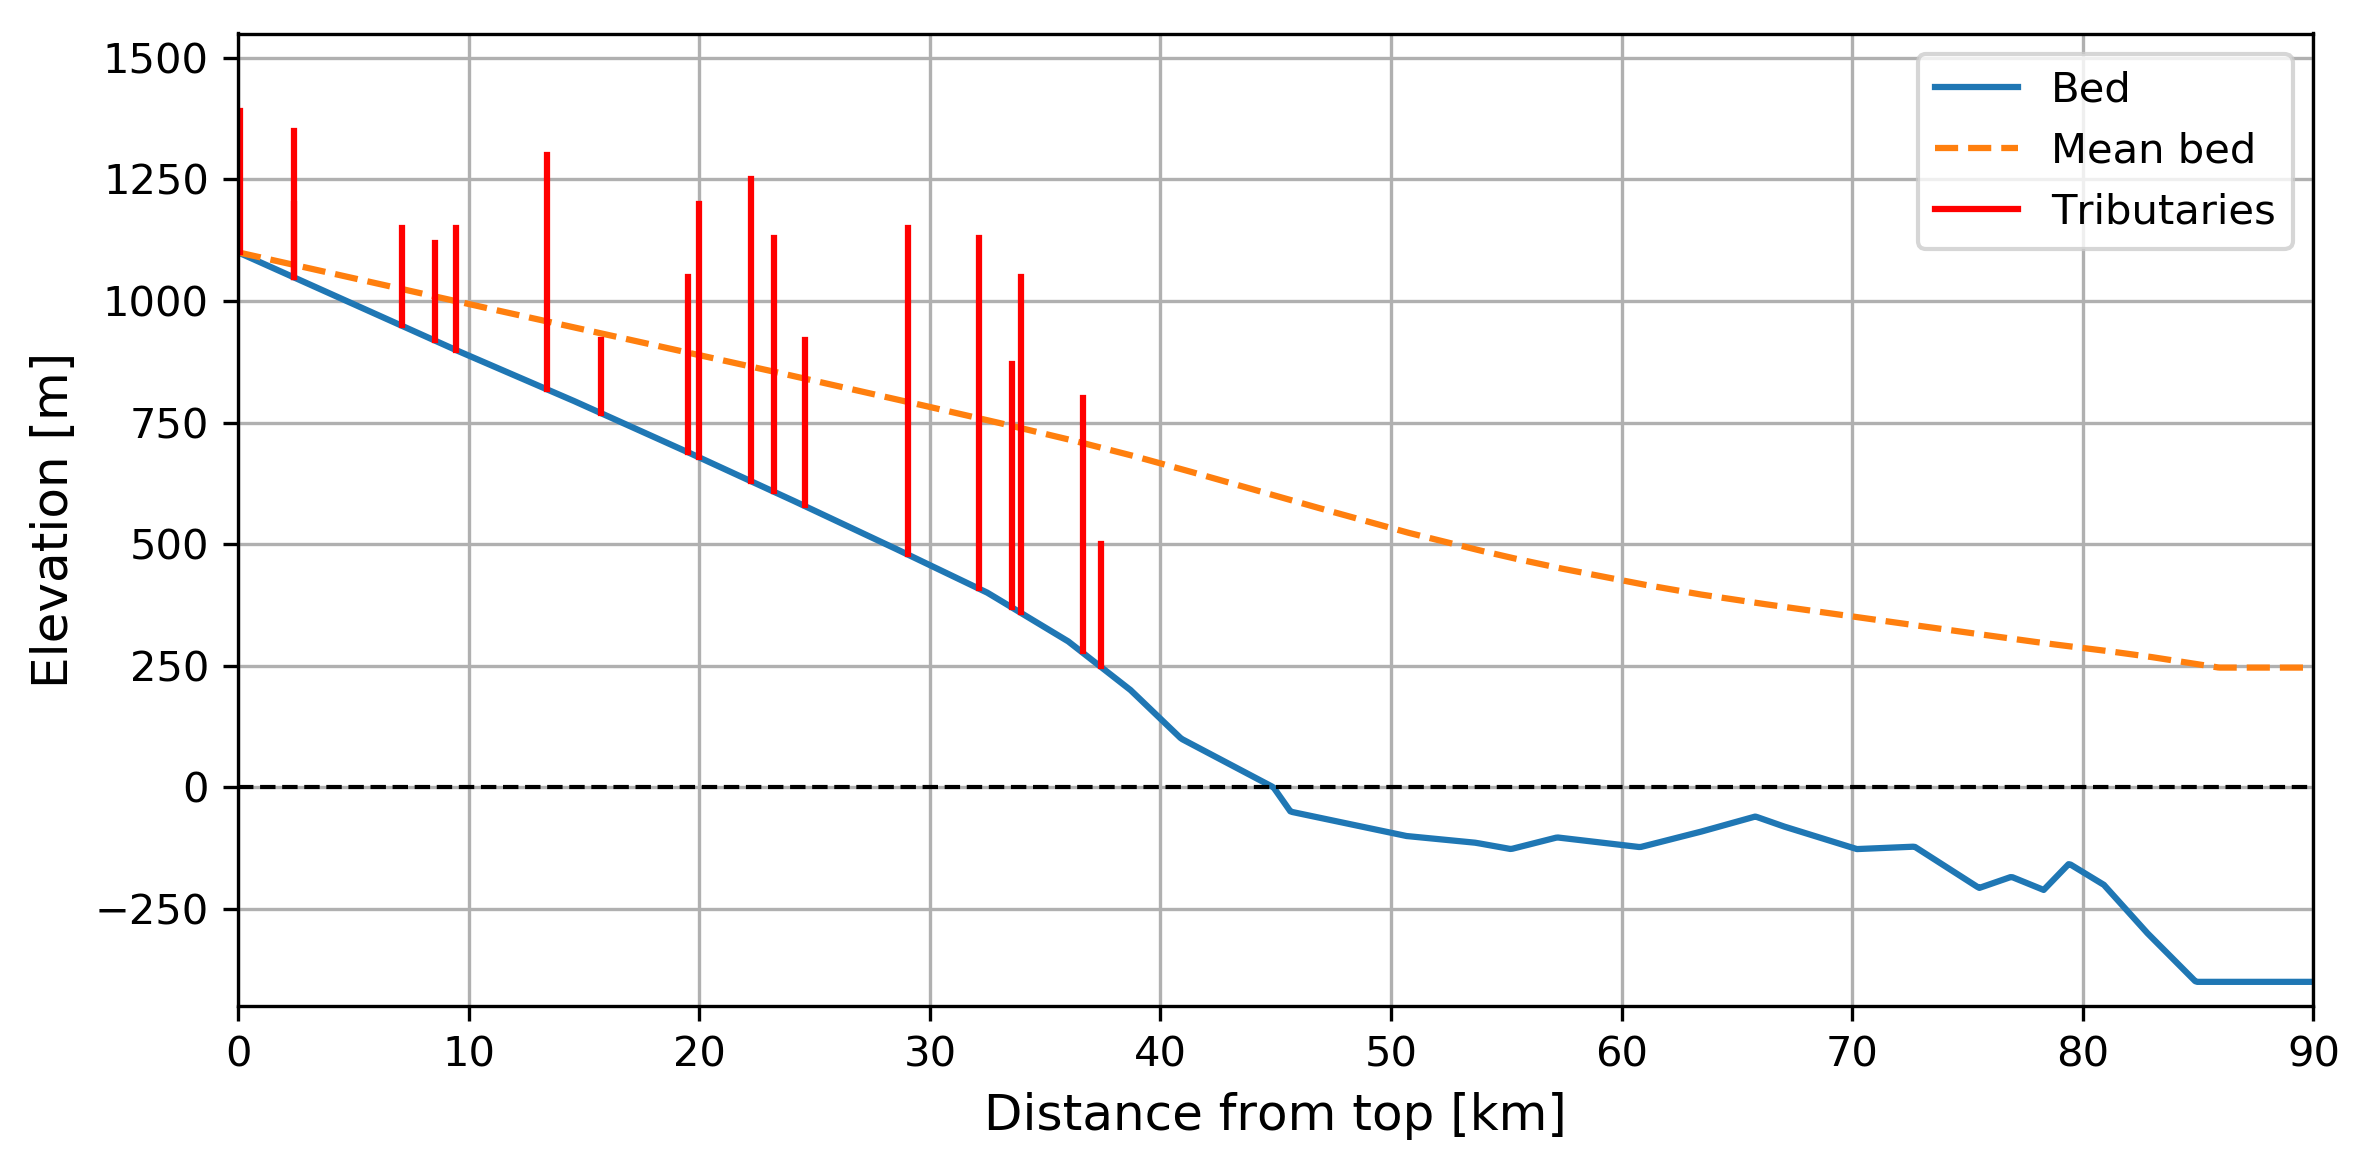

In [3]:
plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.plot(x/1e3, y, "-", label="Bed")
plt.plot(x/1e3, [veteranen.mean_bed(xi) for xi in x], "--", label="Mean bed")
plt.plot(x/1e3, np.zeros(np.size(x)), "--", c="black", linewidth=1) # sealevel
# plt.plot([sl_x/1e3, sl_x/1e3], [-1500, 1500], "--", c="gray", linewidth=1) # sealevel crossing

for trib in veteranen.tributary:
    x_i = np.int(np.argwhere(y < trib.h0)[0])
    # print(x[x_i], trib.h0)
    plt.plot(2*[x[x_i]/1e3], [trib.h0, trib.h1], c="red") # lines
    # plt.scatter(x[x_i]/1e3, trib.h0, s=25, c="red", marker="+") # points

plt.plot([-100, -10], [0,0], c="red", label="Tributaries")

# plt.title("Bed")
plt.grid()
plt.legend()
plt.xlim([np.min(x)/1e3, np.max(x)/1e3])
plt.ylim([-450, 1550])
plt.xlabel("Distance from top [km]", fontsize=12)
plt.ylabel("Elevation [m]", fontsize=12)
plt.tight_layout()
plt.savefig("figures/bed_tributary.png")
plt.show()

## Slope

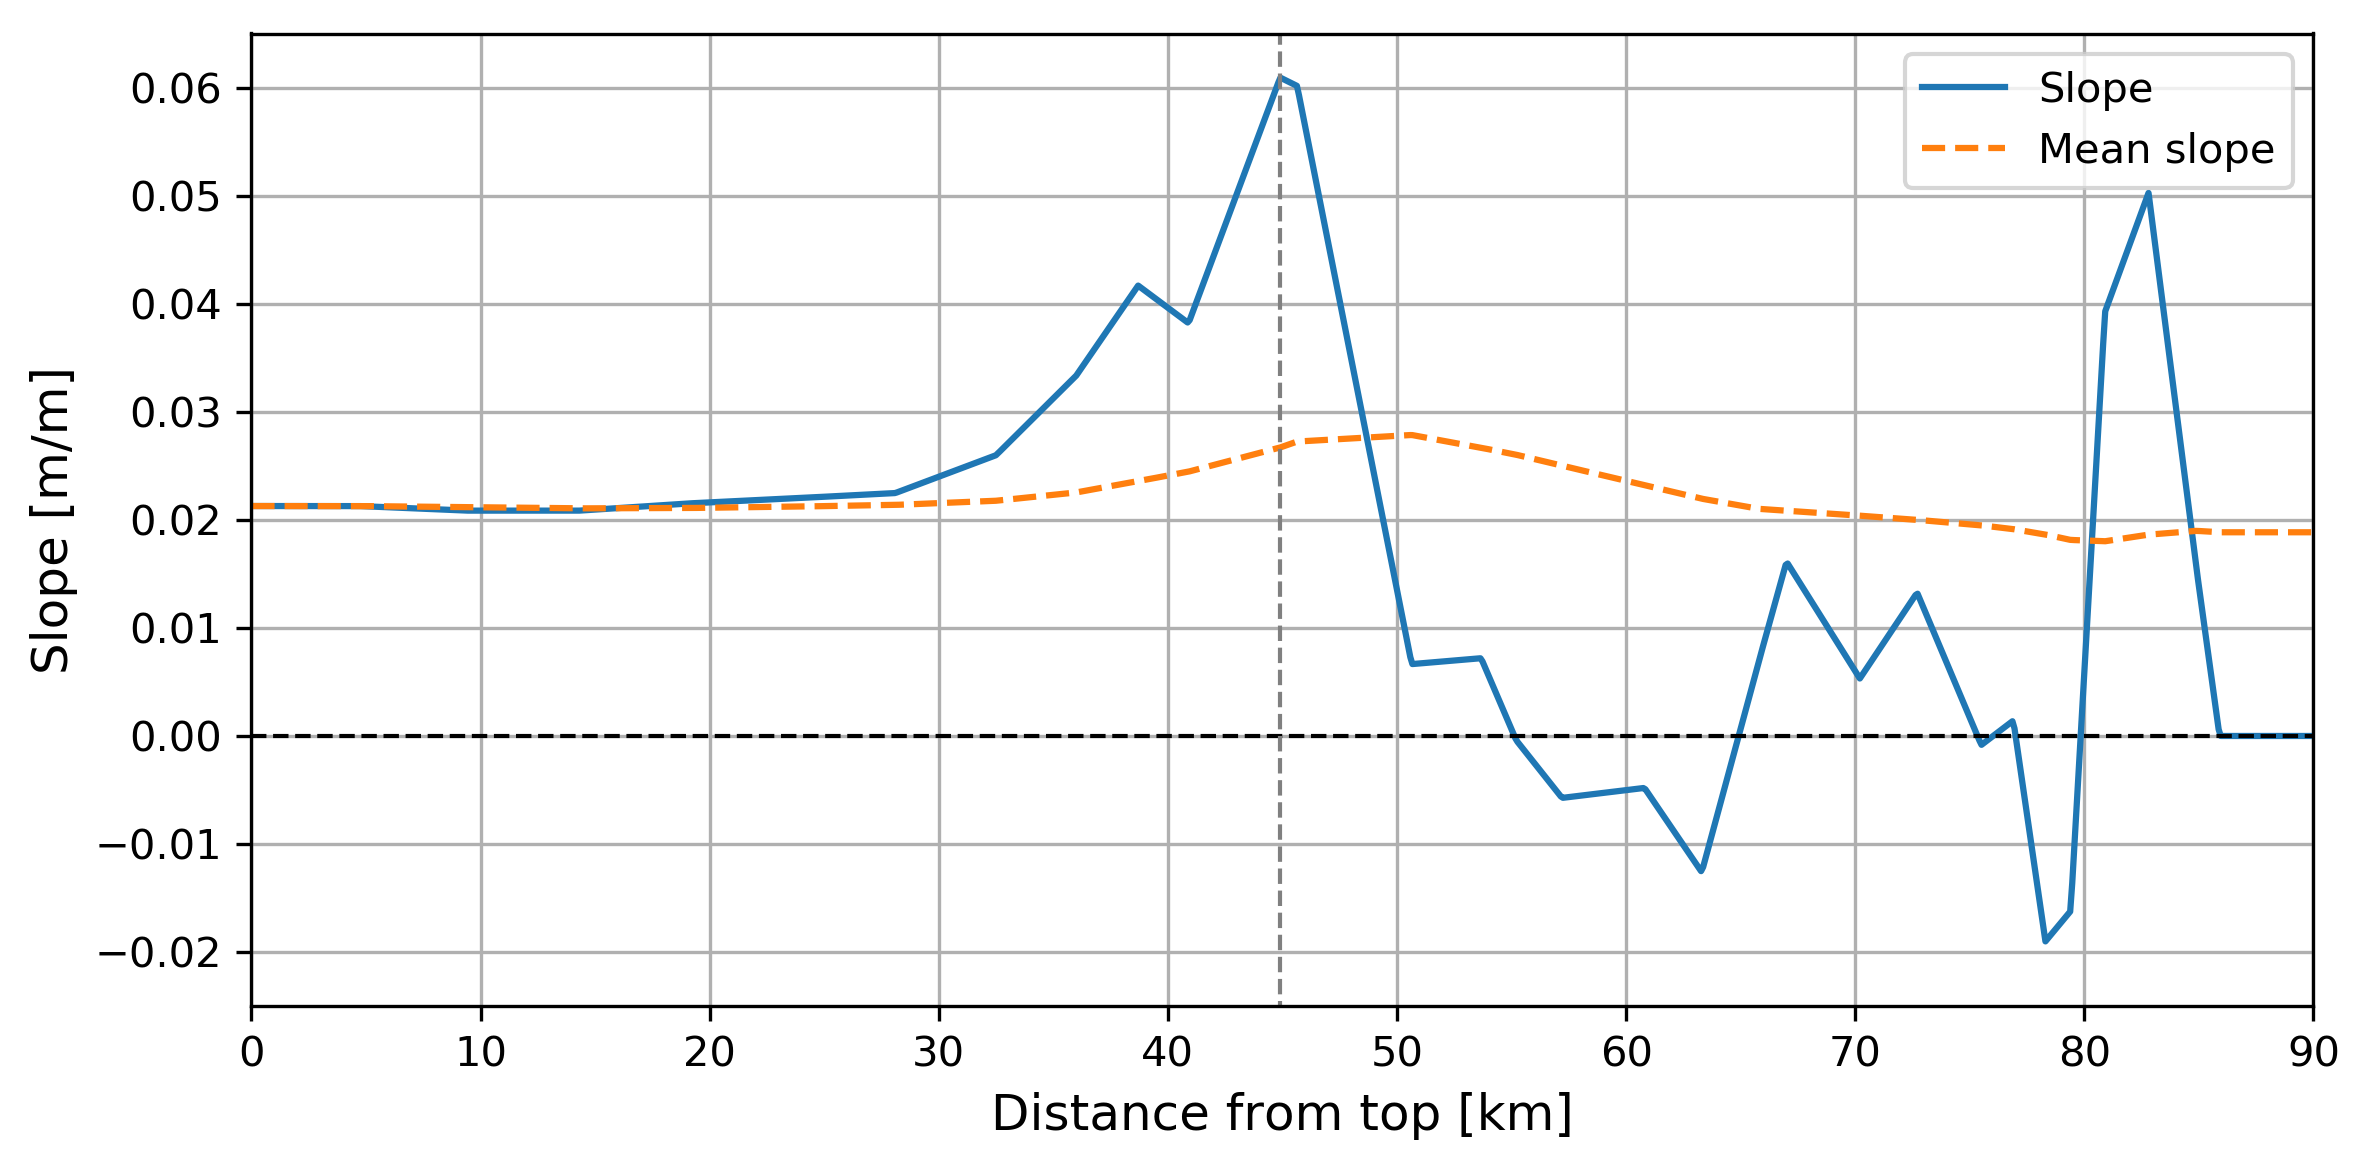

In [4]:
plt.figure(figsize=(fig_w, fig_h), dpi=dpi)
plt.plot(x/1e3, [veteranen.slope(xi) for xi in x], "-", label="Slope")
plt.plot(x/1e3, [veteranen.mean_slope(xi) for xi in x], "--", label="Mean slope")
plt.plot(x/1e3, np.zeros(np.size(x)), "--", c="black", linewidth=1) # sealevel
plt.plot([sl_x/1e3, sl_x/1e3], [-0.05, 0.10], "--", c="gray", linewidth=1) # sealevel crossing

# plt.title("Bed")
plt.grid()
plt.legend()
plt.xlim([np.min(x)/1e3, np.max(x)/1e3])
plt.ylim([-0.025, 0.065])
plt.xlabel("Distance from top [km]", fontsize=12)
plt.ylabel("Slope [m/m]", fontsize=12)
plt.tight_layout()
plt.savefig("figures/slope.png")
plt.show()